In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set()
bitcoin = pd.read_excel('GDAX.BTC-USD_790301_230316.xlsx')
smp500 = pd.read_csv('^spx_d (1).csv')

In [40]:
bitcoin.drop(range(362),inplace=True)
bitcoin.drop(range(2915, 2990),inplace=True)
bitcoin.head(5)

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
362,GDAX.BTC-USD,D,20160101,0,430.35,437.15,427.92,435.66,3788
363,GDAX.BTC-USD,D,20160102,0,435.67,437.56,432.41,435.40,3195
364,GDAX.BTC-USD,D,20160103,0,435.40,435.75,425.02,431.91,3840
365,GDAX.BTC-USD,D,20160104,0,431.90,435.79,431.37,433.85,5848
366,GDAX.BTC-USD,D,20160105,0,433.84,435.64,430.00,433.34,5111


In [41]:
bitcoin = bitcoin.iloc[:,[2,7]]
bitcoin.columns = ['Date', 'Close']
bitcoin['Date'] = bitcoin['Date'].map(lambda x:str(x)[0:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8]) 
smp500 = smp500[['Date','Close']]

table = smp500.set_index('Date').join(bitcoin.set_index('Date'), lsuffix='-')
table = table.dropna()
table.columns = ['smp500', 'bitcoin']
table.head(5)

,smp500,bitcoin
Date,,
2016-01-04,2012.66,433.85
2016-01-05,2016.71,433.34
2016-01-06,1990.26,430.87
2016-01-07,1943.09,459.07
2016-01-08,1922.03,454.44


In [42]:
table['difference'] = table['bitcoin']-table['smp500']
table.head(5)

,smp500,bitcoin,difference
Date,,,
2016-01-04,2012.66,433.85,-1578.81
2016-01-05,2016.71,433.34,-1583.37
2016-01-06,1990.26,430.87,-1559.39
2016-01-07,1943.09,459.07,-1484.02
2016-01-08,1922.03,454.44,-1467.59


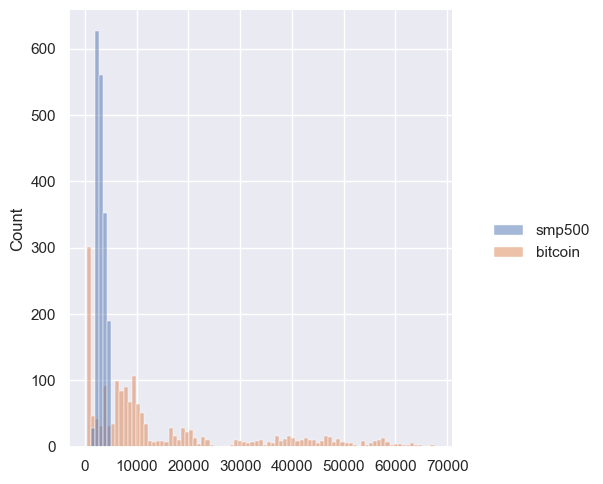

In [43]:
sns.displot(table[['smp500', 'bitcoin']])

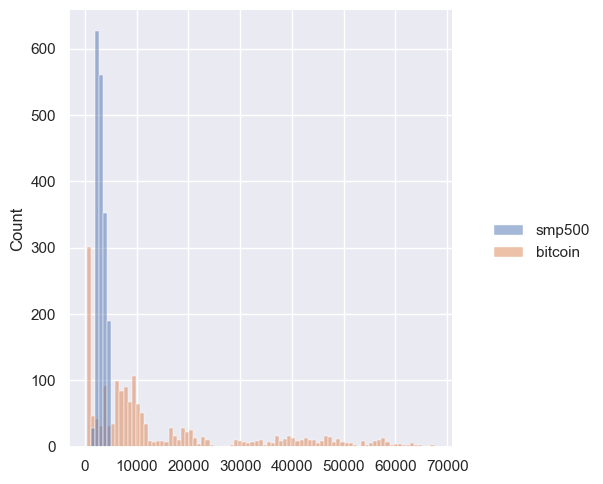

In [44]:
sns.displot(table[['smp500', 'bitcoin']], kde = False, color= "limegreen")

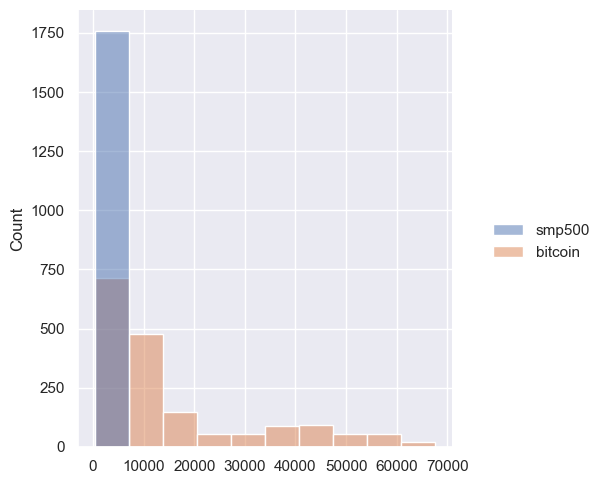

In [45]:
sns.displot(table[['smp500', 'bitcoin']], kde = False,
            color= "limegreen",
            bins = 10,
            # hist_kws = {"alpha": 0.75,
            #             "edgecolor" : "black"}
            )

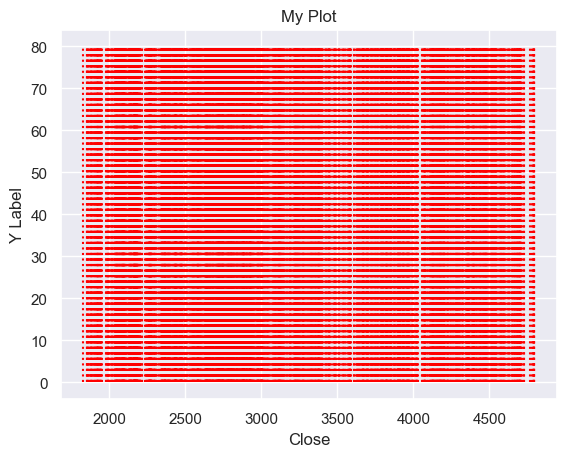

In [46]:
plt.title('My Plot')
plt.xlabel('Close')
plt.ylabel('Y Label')

plt.vlines(x =table['smp500'], ymin=0, ymax=80, color = "red", linestyles="dotted")